[[Variables]]
    Il:  0.02042185 (init = 1e-12)
    I0:  3.2923e-10 (init = 1e-06)
    n:   10.0000000 (init = 10)
    T:   400.000000 (init = 270)


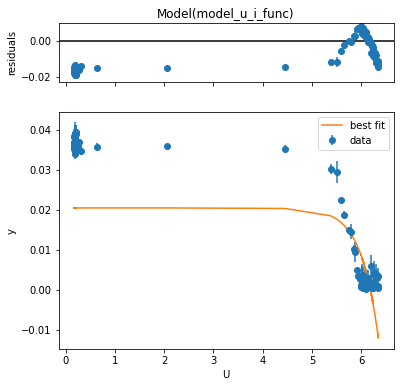

(0.020421845577859754, 3.2923092031401335e-10, 10.0, 399.99999964569884)

In [8]:
import lmfit
import lmfit.printfuncs
import numpy as np
import pandas as pd
from lmfit import Parameters
from matplotlib import pyplot as plt

df = pd.read_csv("~/Desktop/test3.csv")


def model_u_i_func(U, Il, I0, n, T):
    e = 1.602E-19
    k = 1.381E-23
    return Il - I0 * (np.exp((e * U) / (n * k * T)) - 1)

def fit_params_for_u_i(u, u_err, i, i_err):
    m = lmfit.model.Model(model_u_i_func)

    params = Parameters()
    params.add("Il", value=1E-12, min=1E-20, max=1)
    params.add("I0", value=1E-6, min=1E-20, max=1)
    params.add("n", value=10, min=10, max=15)
    params.add("T", value=270, min=250, max=400)

    fit = m.fit(i, U=u, weights=1/i_err, params=params)
    lmfit.printfuncs.report_fit(fit.params, min_correl=0.5)
    fit.plot()
    plt.show()
    return fit.params["Il"].value, fit.params["I0"].value, fit.params["n"].value, fit.params["T"].value

fit_params_for_u_i(df["U"], df["U_err"], df["I"], df["I_err"])


In [25]:
df

,U,U_err,I,I_err,R,R_err,P,P_err,V_out
0,5.873700,0.010180,0.001994,0.000265,3911.842119,488.491218,0.011710,0.000119,1.6144
1,5.848575,0.009002,0.003059,0.000496,2488.006291,210.234304,0.017888,0.000161,1.6522
2,5.833560,0.011829,0.004534,0.001211,2234.028396,258.158774,0.026450,0.000315,1.6552
3,5.835975,0.011661,0.005561,0.001396,2047.013042,241.130704,0.032452,0.000381,1.6582
4,5.845185,0.010617,0.003503,0.000684,2419.197024,236.587880,0.020477,0.000218,1.6588
...,...,...,...,...,...,...,...,...,...
223,0.095325,0.006642,0.009576,0.000320,10.246063,0.840131,0.000913,0.000006,1.8976
224,0.092940,0.005935,0.009644,0.000605,10.281188,0.817588,0.000896,0.000005,1.8982
225,0.107895,0.005566,0.010226,0.001159,14.652076,2.898300,0.001103,0.000006,1.8988
226,0.104565,0.010495,0.011394,0.001227,10.473518,1.241470,0.001191,0.000013,1.8994


2108.1849486442447
